In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
df_acc = pd.read_csv("account_activity.csv")
df_ano = pd.read_csv("anomaly_scores.csv")
df_amo = pd.read_csv("amount_data.csv")
df_cust = pd.read_csv("customer_data.csv")
df_fraud = pd.read_csv("fraud_indicators.csv")
df_merch = pd.read_csv("merchant_data.csv")
df_sus = pd.read_csv("suspicious_activity.csv")
df_trans_label = pd.read_csv("transaction_category_labels.csv")
df_trans_meta = pd.read_csv("transaction_metadata.csv")
df_trans_rec = pd.read_csv("transaction_records.csv")


In [3]:
df_merged_0 = df_fraud.merge(df_ano, left_on="TransactionID", right_on="TransactionID", how="inner")
df_merged_1 = df_acc.merge(df_cust, left_on="CustomerID", right_on="CustomerID", how="inner")
df_merged_0 = df_merged_0.merge(df_trans_label, on="TransactionID", how="inner")
df_merged_0 = df_merged_0.merge(df_trans_meta, on="TransactionID", how="inner")
df_merged_0 = df_merged_0.merge(df_trans_rec, on="TransactionID", how="inner")
df_merged_0 = df_merged_0.merge(df_sus, on="CustomerID", how="inner")
df_merged_0 = df_merged_0.merge(df_merch, on="MerchantID", how="inner")

In [4]:
df = df_merged_0.merge(df_merged_1, on="CustomerID", how="inner")

In [5]:
df

,TransactionID,FraudIndicator,AnomalyScore,Category,Timestamp,MerchantID,Amount,CustomerID,SuspiciousFlag,MerchantName,Location,AccountBalance,LastLogin,Name,Age,Address
0,1,0,0.686699,Other,01-01-2022 00:00,2701,55.530334,1952,0,Merchant 2701,Location 2701,2869.689912,2024-08-09,Customer 1952,50,Address 1952
1,895,0,0.040817,Food,07-02-2022 06:00,2149,53.683898,1952,0,Merchant 2149,Location 2149,2869.689912,2024-08-09,Customer 1952,50,Address 1952
2,914,0,0.856704,Other,08-02-2022 01:00,2701,96.523142,1009,0,Merchant 2701,Location 2701,5359.747810,2022-01-09,Customer 1009,32,Address 1009
3,294,0,0.401233,Other,13-01-2022 05:00,2253,35.151451,1009,0,Merchant 2253,Location 2253,5359.747810,2022-01-09,Customer 1009,32,Address 1009
4,2,0,0.081749,Online,01-01-2022 01:00,2070,12.881180,1027,0,Merchant 2070,Location 2070,9527.947107,2022-01-27,Customer 1027,46,Address 1027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,973,0,0.399450,Food,10-02-2022 12:00,2396,40.390329,1661,0,Merchant 2396,Location 2396,4915.427164,2023-10-23,Customer 1661,34,Address 1661
996,980,0,0.507261,Travel,10-02-2022 19:00,2666,59.308867,1421,0,Merchant 2666,Location 2666,6341.743797,2023-02-25,Customer 1421,41,Address 1421
997,984,0,0.169398,Online,10-02-2022 23:00,2593,49.450072,1884,0,Merchant 2593,Location 2593,6010.648922,2024-06-02,Customer 1884,55,Address 1884
998,989,0,0.029543,Food,11-02-2022 04:00,2284,20.443811,1312,0,Merchant 2284,Location 2284,6018.443647,2022-11-08,Customer 1312,26,Address 1312


In [6]:
df.isnull().sum()

TransactionID     0
FraudIndicator    0
AnomalyScore      0
Category          0
Timestamp         0
MerchantID        0
Amount            0
CustomerID        0
SuspiciousFlag    0
MerchantName      0
Location          0
AccountBalance    0
LastLogin         0
Name              0
Age               0
Address           0
dtype: int64

In [7]:
df.to_csv("Combinedframe.csv")

In [8]:
# Convert 'Timestamp' to datetime using the correct format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y %H:%M')

# Extract date and minute components
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek  # Monday is 0 and Sunday is 6
df['Hour'] = df['Timestamp'].dt.hour
df['Minute'] = df['Timestamp'].dt.minute


In [9]:
df['LastLogin'] = pd.to_datetime(df['LastLogin'], format='%Y-%m-%d')

df['Year_Login'] = df['LastLogin'].dt.year
df['Month_login'] = df['LastLogin'].dt.month
df['Day'] = df['LastLogin'].dt.day


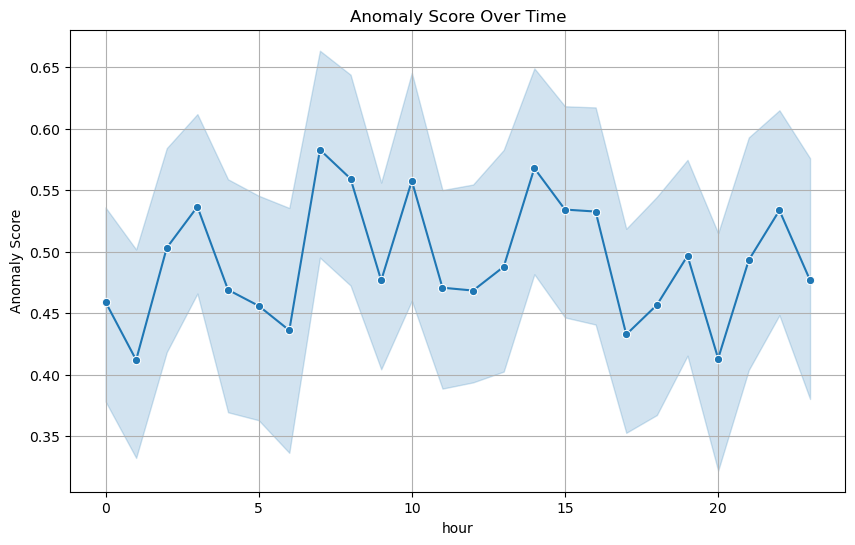

In [88]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Hour', y='AnomalyScore', data=df, marker='o')
plt.title("Anomaly Score Over Time")
plt.xlabel("hour")
plt.ylabel("Anomaly Score")
plt.grid(True)
plt.show()

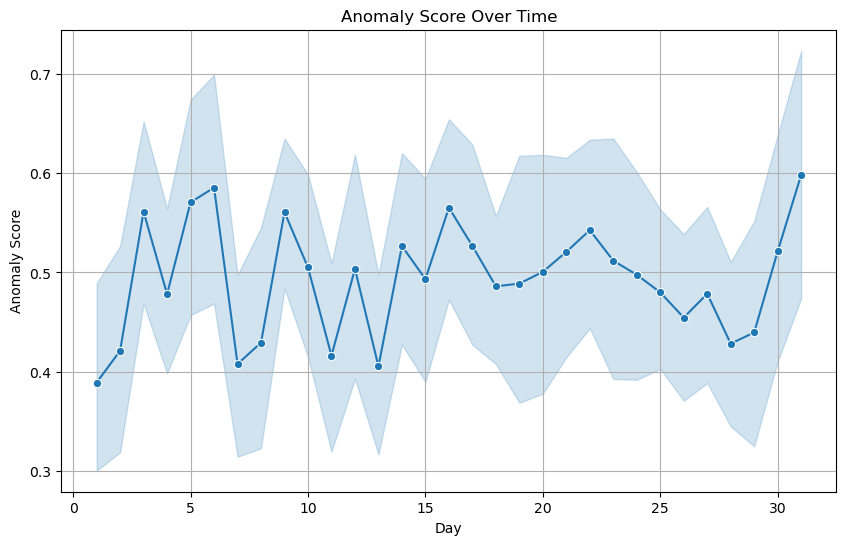

In [11]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Day', y='AnomalyScore', data=df, marker='o')
plt.title("Anomaly Score Over Time")
plt.xlabel("Day")
plt.ylabel("Anomaly Score")
plt.grid(True)
plt.show()

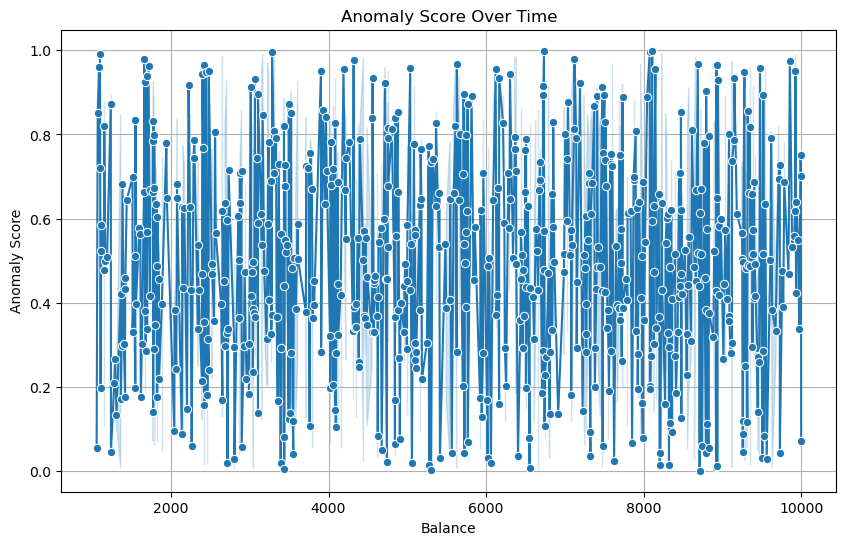

In [12]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='AccountBalance', y='AnomalyScore', data=df, marker='o')
plt.title("Anomaly Score Over Time")
plt.xlabel("Balance")
plt.ylabel("Anomaly Score")
plt.grid(True)
plt.show()

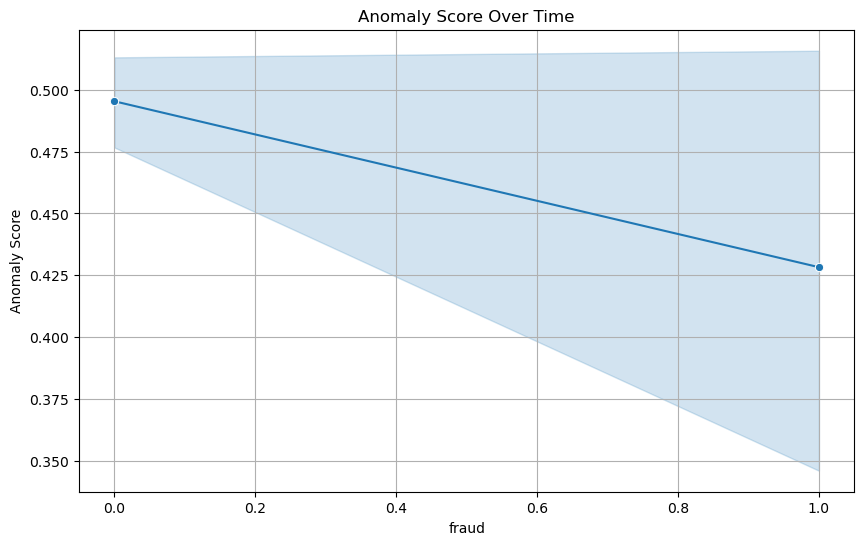

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='FraudIndicator', y='AnomalyScore', data=df, marker='o')
plt.title("Anomaly Score Over Time")
plt.xlabel("fraud")
plt.ylabel("Anomaly Score")
plt.grid(True)
plt.show()

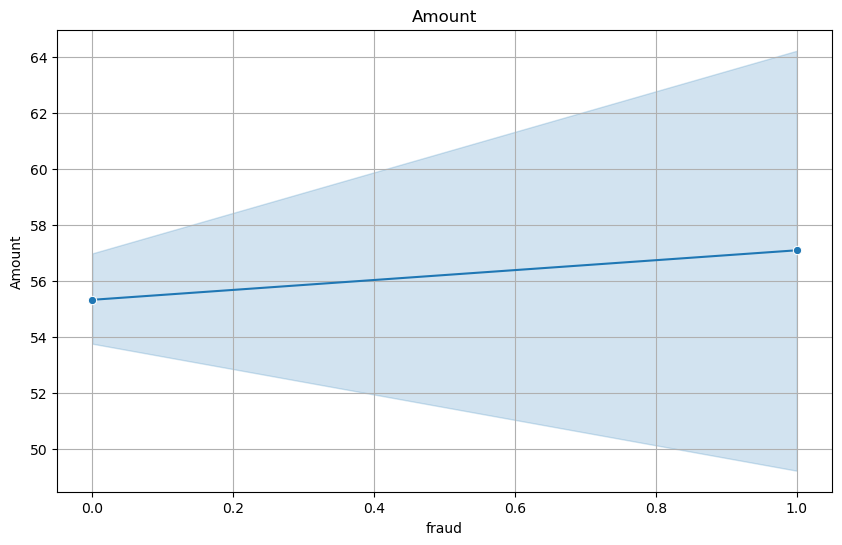

In [14]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='FraudIndicator', y='Amount', data=df, marker='o')
plt.title("Amount")
plt.xlabel("fraud")
plt.ylabel("Amount")
plt.grid(True)
plt.show()

In [15]:
df_fraud = df["FraudIndicator"] == 1 

df_fraud = df[df_fraud]

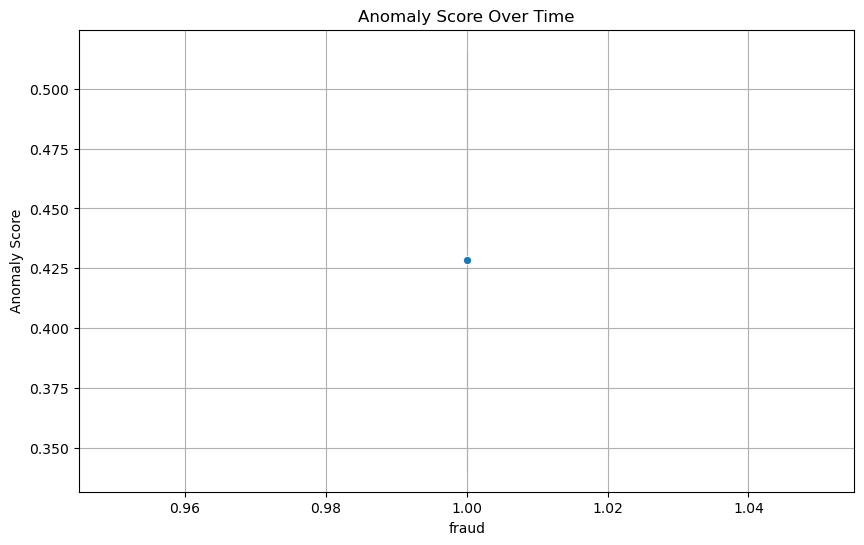

In [16]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='FraudIndicator', y='AnomalyScore', data=df_fraud, marker='o')
plt.title("Anomaly Score Over Time")
plt.xlabel("fraud")
plt.ylabel("Anomaly Score")
plt.grid(True)
plt.show()

<Axes: >

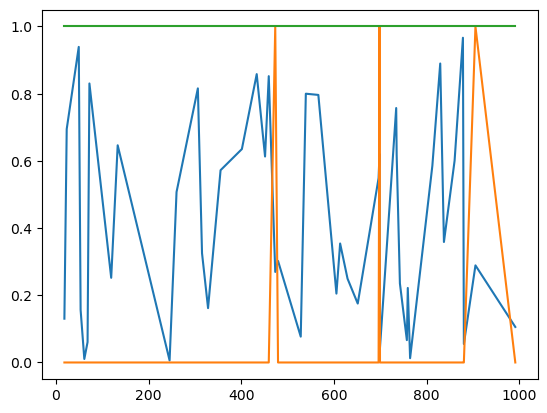

In [17]:
df_fraud["AnomalyScore"].plot()
df_fraud["SuspiciousFlag"].plot()
df_fraud["FraudIndicator"].plot()

<Axes: >

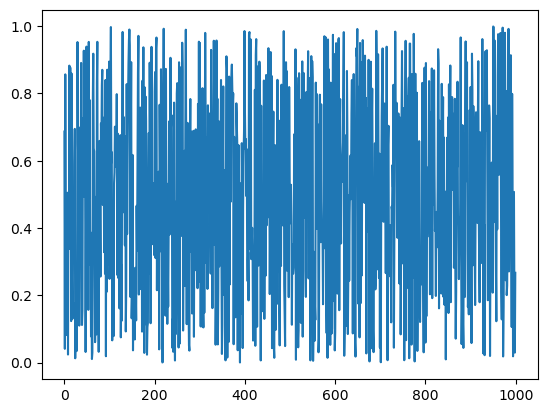

In [18]:
df["AnomalyScore"].plot()

<Axes: xlabel='Category'>

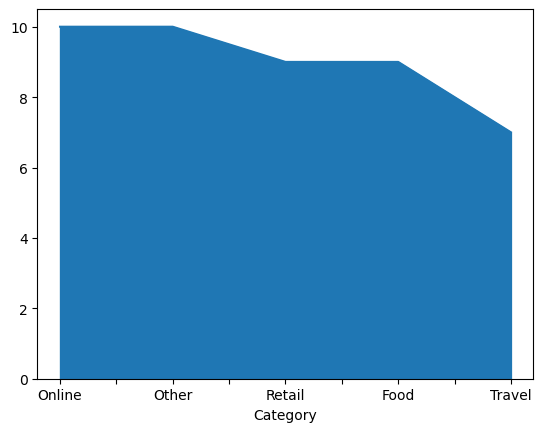

In [19]:
df_fraud["Category"].value_counts().plot(kind = 'area')

<Axes: xlabel='Category'>

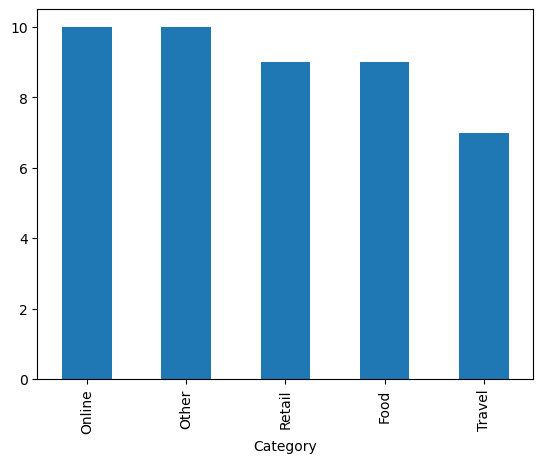

In [20]:
df_fraud["Category"].value_counts().plot(kind = 'bar')

<Axes: xlabel='Amount'>

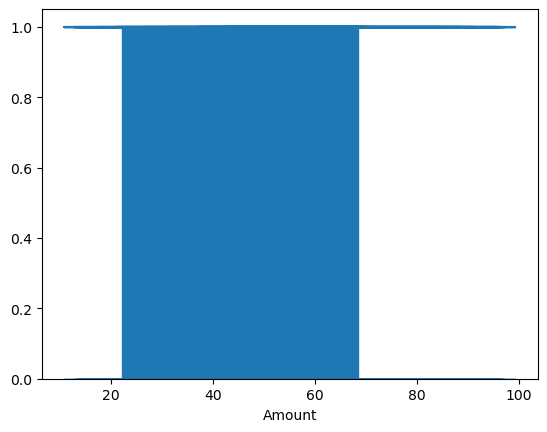

In [21]:
df_fraud["Amount"].value_counts().plot(kind = "area")

<Axes: >

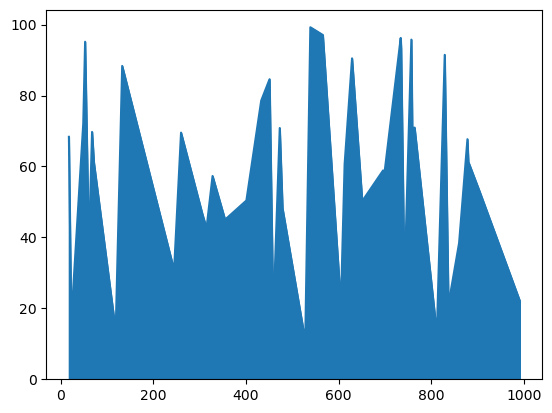

In [22]:
df_fraud["Amount"].plot(kind = "area")

<Axes: xlabel='Day'>

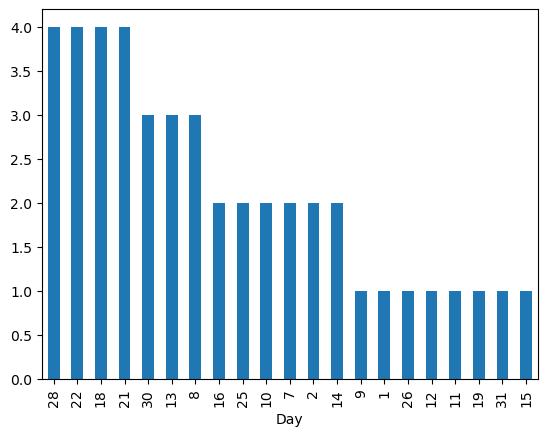

In [23]:
df_fraud["Day"].value_counts().plot(kind = "bar")






<Axes: xlabel='DayOfWeek'>

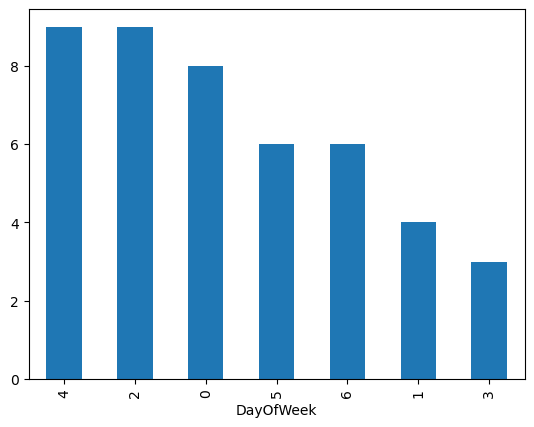

In [24]:
df_fraud["DayOfWeek"].value_counts().plot(kind = "bar")

<Axes: xlabel='Minute'>

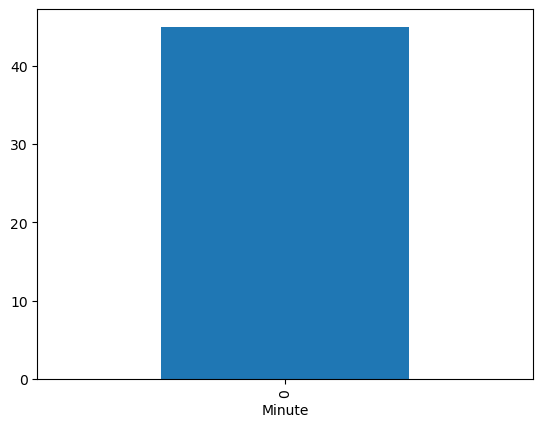

In [25]:
df_fraud["Minute"].value_counts().plot(kind = "bar")

<Axes: xlabel='Month'>

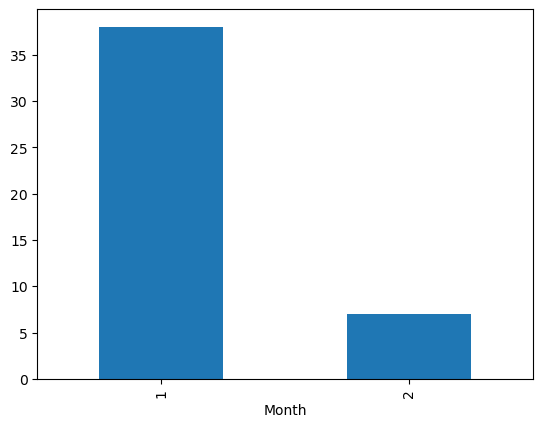

In [26]:
df_fraud["Month"].value_counts().plot(kind = "bar")


<Axes: xlabel='Year'>

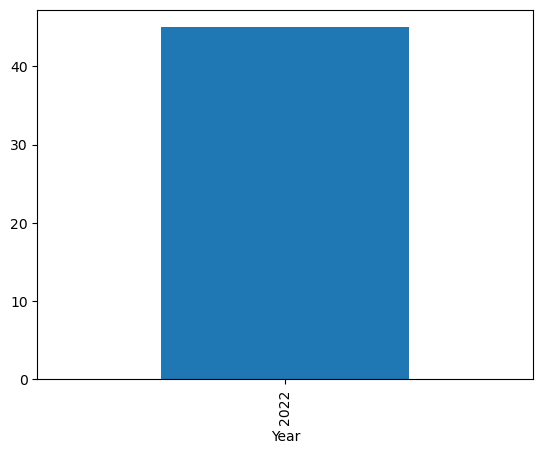

In [27]:
df_fraud["Year"].value_counts().plot(kind = "bar")

<Axes: xlabel='Month'>

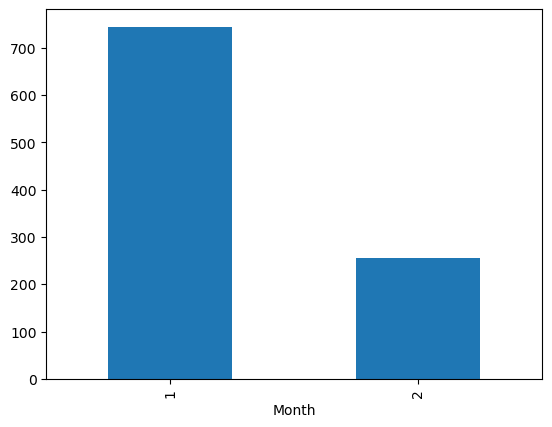

In [28]:
df["Month"].value_counts().plot(kind = "bar")

Text(0.5, 1.0, 'Histogram with KDE')

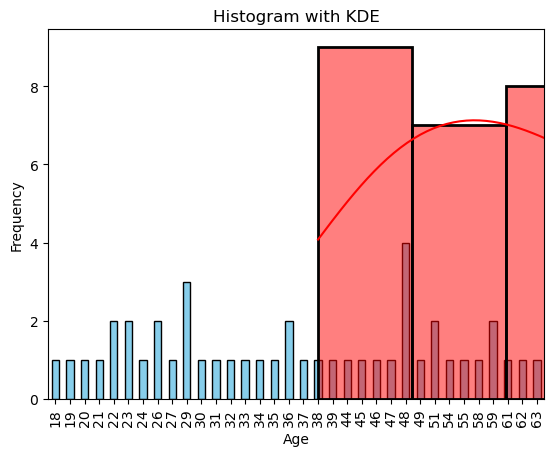

In [29]:
df_fraud["Age"].value_counts().sort_index().plot(kind="bar", color="skyblue", edgecolor="black")

# Using seaborn to add a KDE to the histogram
sns.histplot(df_fraud["Age"], kde=True, color="red", linewidth=2)

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram with KDE")

In [30]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming df is your DataFrame with a column named "Category"

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Reshape the column to a 2D array
category_reshaped = df['Category'].values.reshape(-1, 1)

# Fit and transform the data using the encoder
encoded_data = encoder.fit_transform(category_reshaped)

# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=[f'Category_{category}' for category in encoder.get_feature_names_out(['Category'])])

# Concatenate the original DataFrame with the encoded DataFrame
df_encoded = pd.concat([df, encoded_df], axis=1)

# Display the encoded DataFrame
print(df_encoded)


     TransactionID  FraudIndicator  AnomalyScore Category           Timestamp  \
0                1               0      0.686699    Other 2022-01-01 00:00:00   
1              895               0      0.040817     Food 2022-02-07 06:00:00   
2              914               0      0.856704    Other 2022-02-08 01:00:00   
3              294               0      0.401233    Other 2022-01-13 05:00:00   
4                2               0      0.081749   Online 2022-01-01 01:00:00   
..             ...             ...           ...      ...                 ...   
995            973               0      0.399450     Food 2022-02-10 12:00:00   
996            980               0      0.507261   Travel 2022-02-10 19:00:00   
997            984               0      0.169398   Online 2022-02-10 23:00:00   
998            989               0      0.029543     Food 2022-02-11 04:00:00   
999            996               0      0.266778     Food 2022-02-11 11:00:00   

     MerchantID     Amount 

C:\Users\Vaidik\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Anomaly detection with Autoencoders

In [31]:
df.iloc[1]

TransactionID                     895
FraudIndicator                      0
AnomalyScore                 0.040817
Category                         Food
Timestamp         2022-02-07 06:00:00
MerchantID                       2149
Amount                      53.683898
CustomerID                       1952
SuspiciousFlag                      0
MerchantName            Merchant 2149
Location                Location 2149
AccountBalance            2869.689912
LastLogin         2024-08-09 00:00:00
Name                    Customer 1952
Age                                50
Address                  Address 1952
Year                             2022
Month                               2
Day                                 9
DayOfWeek                           0
Hour                                6
Minute                              0
Year_Login                       2024
Month_login                         8
Name: 1, dtype: object

In [32]:

pip install -U scikit-learn imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [52]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# Drop unnecessary columns
x = df.drop(["FraudIndicator", "Timestamp", "Category", "LastLogin", "Name", "MerchantName", "Address", "Location"], axis=1)

# Select relevant columns for y
Y = df[["FraudIndicator"]]

# Assuming X and y are your features and labels
X_train, X_val, y_train, y_val = train_test_split(x, Y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_val_scaled = scaler.transform(X_val)

# Build a simple autoencoder
input_dim = X_train_scaled.shape[1]

# Identify the majority class
majority_class_label = 0

# Subset the training data for the majority class
X_train_majority = X_train_scaled[y_train_resampled['FraudIndicator'] == majority_class_label]

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(input_dim,)),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=input_dim, activation='linear')
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Lists to store accuracy and loss values during training
train_loss = []
val_loss = []
train_accuracy = []
val_accuracy = []

# Train the autoencoder on majority class using resampled data
history = model.fit(X_train_majority, X_train_majority, epochs=50, batch_size=32, validation_data=(X_val_scaled, X_val_scaled))

# Store training and validation accuracy and loss values
train_loss.extend(history.history['loss'])
val_loss.extend(history.history['val_loss'])
train_accuracy.extend(history.history['accuracy'])
val_accuracy.extend(history.history['val_accuracy'])

# Use the trained autoencoder to reconstruct instances
reconstructed_data = model.predict(X_val_scaled)

# Calculate reconstruction errors
reconstruction_errors = tf.reduce_mean(tf.square(X_val_scaled - reconstructed_data), axis=1)

# Convert TensorFlow tensor to NumPy array for quantile calculation
reconstruction_errors_np = reconstruction_errors.numpy()

# Define a threshold for anomaly detection (e.g., based on quantiles)
threshold = np.quantile(reconstruction_errors_np, 0.95)
# Identify anomalies
anomalies = (reconstruction_errors_np > threshold).astype(int)


Epoch 1/50
24/24 [==============================] - 2s 19ms/step - loss: 0.9067 - accuracy: 0.1551 - val_loss: 0.7631 - val_accuracy: 0.2650
Epoch 2/50
24/24 [==============================] - 0s 7ms/step - loss: 0.7213 - accuracy: 0.3468 - val_loss: 0.5749 - val_accuracy: 0.4250
Epoch 3/50
24/24 [==============================] - 0s 7ms/step - loss: 0.5053 - accuracy: 0.4433 - val_loss: 0.3777 - val_accuracy: 0.5000
Epoch 4/50
24/24 [==============================] - 0s 6ms/step - loss: 0.3197 - accuracy: 0.5280 - val_loss: 0.2334 - val_accuracy: 0.5000
Epoch 5/50
24/24 [==============================] - 0s 6ms/step - loss: 0.1897 - accuracy: 0.6037 - val_loss: 0.1463 - val_accuracy: 0.6200
Epoch 6/50
24/24 [==============================] - 0s 5ms/step - loss: 0.1147 - accuracy: 0.6558 - val_loss: 0.0940 - val_accuracy: 0.7100
Epoch 7/50
24/24 [==============================] - 0s 7ms/step - loss: 0.0776 - accuracy: 0.6988 - val_loss: 0.0730 - val_accuracy: 0.7350
Epoch 8/50
24/24 [=

In [53]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 1 is the minority class (fraud)
print("Classification Report:\n", classification_report(y_val, anomalies))
print("Confusion Matrix:\n", confusion_matrix(y_val, anomalies))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       188
           1       0.10      0.08      0.09        12

    accuracy                           0.90       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.89      0.90      0.90       200

Confusion Matrix:
 [[179   9]
 [ 11   1]]


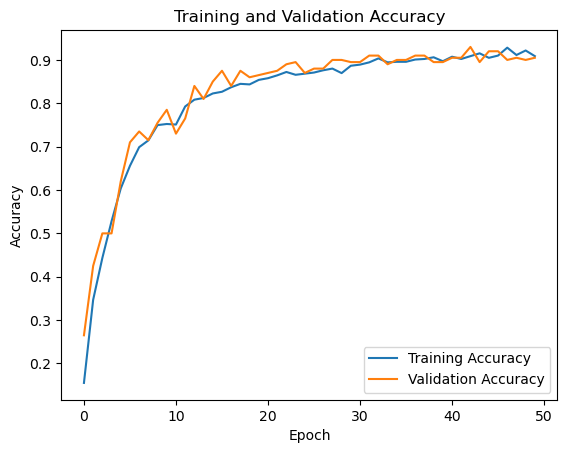

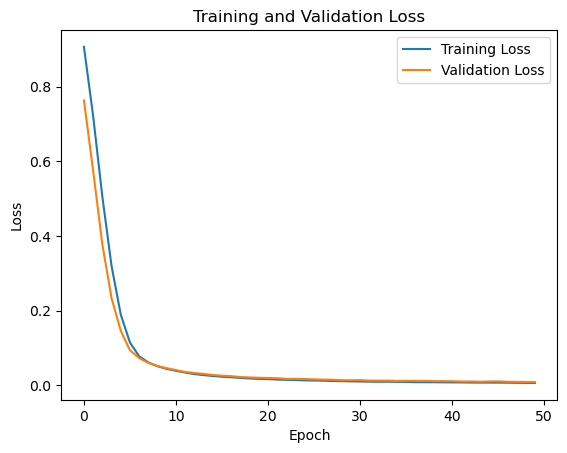

In [54]:

# Plotting the training and validation accuracy
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting the training and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [48]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Drop unnecessary columns
X = df.drop(["FraudIndicator", "SuspiciousFlag", "AnomalyScore", "Timestamp", "Category", "LastLogin", "Name", "MerchantName", "Address", "Location"], axis=1)

# Select relevant columns for y
y = df[["FraudIndicator", "SuspiciousFlag", "AnomalyScore"]]

# Assuming X and y are your features and labels
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Build a simple autoencoder
input_dim = X_train_scaled.shape[1]

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(input_dim,)),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=input_dim, activation='linear')  # Output dimension should be input_dim
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the autoencoder on the entire X_train_scaled data
history = model.fit(X_train_scaled, X_train_scaled,
                    epochs=1000, batch_size=32, verbose=0,
                    validation_data=(X_val_scaled, X_val_scaled))

# Use the trained autoencoder to reconstruct instances
reconstructed_data = model.predict(X_val_scaled)

# Calculate reconstruction errors
reconstruction_errors = tf.reduce_mean(tf.square(X_val_scaled - reconstructed_data), axis=1)

# Convert TensorFlow tensor to NumPy array for quantile calculation
reconstruction_errors_np = reconstruction_errors.numpy()

# Define a threshold for anomaly detection (e.g., based on quantiles)
threshold = np.quantile(reconstruction_errors_np, 0.95)

# Identify anomalies
anomalies = (reconstruction_errors_np > threshold).astype(int)


7/7 [==============================] - 0s 3ms/step


In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Assuming 'anomalies' are the predicted labels and 'y_val' are the true labels
# Convert 'y_val' to binary labels (1 for anomalies, 0 for non-anomalies)
true_labels = (y_val["FraudIndicator"] == 1).astype(int)

# Calculate accuracy
accuracy = accuracy_score(true_labels, anomalies)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(true_labels, anomalies)
print("Precision:", precision)

# Calculate recall
recall = recall_score(true_labels, anomalies)
print("Recall:", recall)


Accuracy: 0.9
Precision: 0.1
Recall: 0.08333333333333333


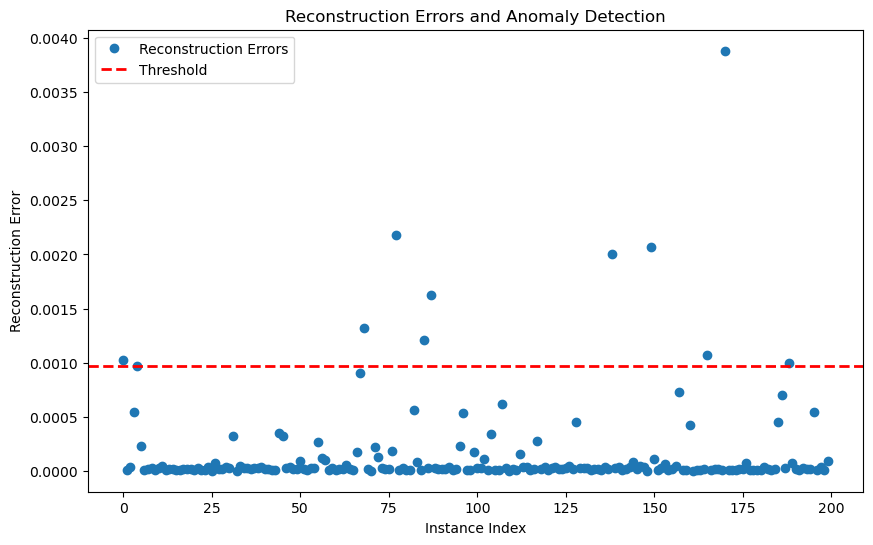

Accuracy of Anomaly Detection: 89.00%


In [37]:
# Plot the reconstruction errors
plt.figure(figsize=(10, 6))
plt.plot(reconstruction_errors_np, label='Reconstruction Errors', marker='o', linestyle='None')
plt.axhline(threshold, color='r', linestyle='dashed', linewidth=2, label='Threshold')
plt.xlabel('Instance Index')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Errors and Anomaly Detection')
plt.legend()
plt.show()

# Calculate accuracy of anomaly detection
true_labels = y_val['FraudIndicator'].values  # Assuming 'FraudIndicator' is the column indicating fraud
predicted_labels = anomalies
accuracy = np.mean(true_labels == predicted_labels)

print(f"Accuracy of Anomaly Detection: {accuracy * 100:.2f}%")

# Xgboost

In [84]:
import xgboost as xgb
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, precision_recall_curve

# Train-test split with SMOTE
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train_resampled, test_size=0.2, random_state=42)

# Create XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic',
                              n_estimators=10000,  # Adjust as needed
                              learning_rate=0.1,
                              max_depth=5,
                              gamma=0.5,
                              subsample=0.8,
                              colsample_bytree=0.8,
                              reg_alpha=1,  # L1 regularization
                              reg_lambda=1,
                              n_jobs = -1)  # L2 regularization

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on validation set
y_pred = xgb_model.predict(X_val)
y_prob = xgb_model.predict_proba(X_val)[:, 1]

# Evaluate performance
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)





Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       147
           1       0.94      0.94      0.94        83

    accuracy                           0.96       230
   macro avg       0.95      0.95      0.95       230
weighted avg       0.96      0.96      0.96       230

Confusion Matrix:
 [[142   5]
 [  5  78]]
Accuracy: 0.9565217391304348


In [85]:
validation_accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {validation_accuracy:.4f}")

Validation Accuracy: 0.9565


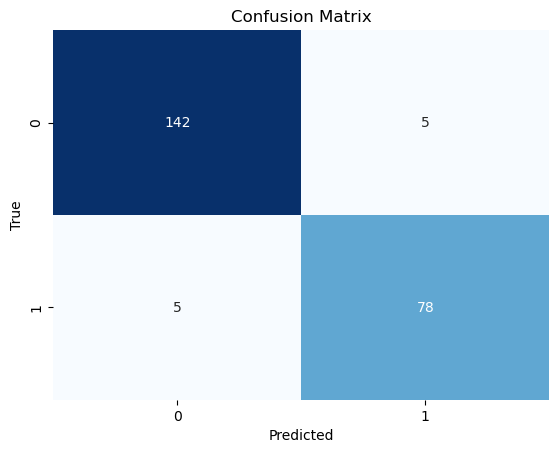

In [86]:
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

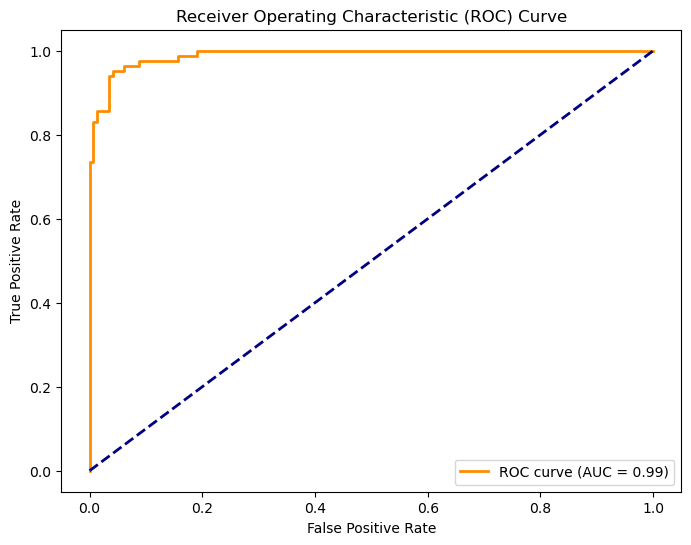

In [87]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


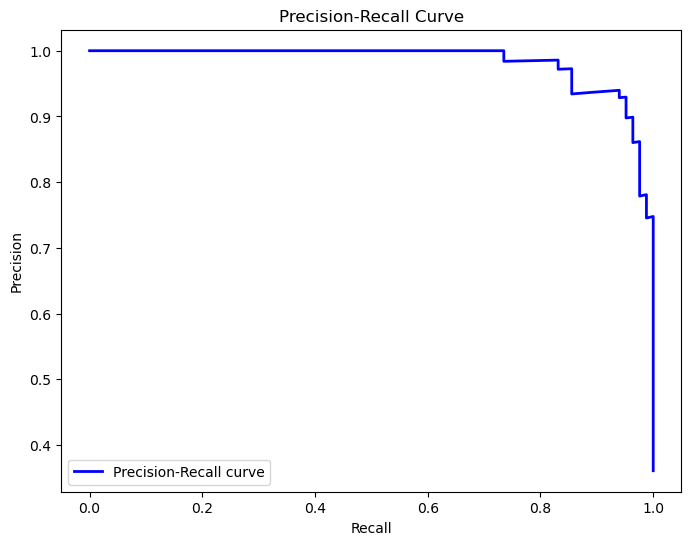

In [83]:
# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_val, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()
